# Wage Data Generation
## Instructor: Dr. Smith | Econometrics 301

*This notebook generates and saves synthetic wage data with:*
- *Strong signals for true predictors*
- *Multiple irrelevant variables*
- *Clear overfitting potential*

In [9]:
import numpy as np
import pandas as pd
import os
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## 1. Data Generation

In [10]:
np.random.seed(42)
n_samples = 1000

# True predictors
educ = np.random.normal(14, 2, n_samples).astype(np.float32)
exper = np.abs(np.random.normal(10, 5, n_samples)).astype(np.float32)
ability = np.random.normal(0, 1, n_samples).astype(np.float32)
female = np.random.binomial(1, 0.45, n_samples).astype(np.float32)
union = np.random.binomial(1, 0.2, n_samples).astype(np.float32)

# Irrelevant variables
height = np.random.normal(170, 10, n_samples).astype(np.float32)
commute_km = np.round(np.random.exponential(scale=10, size=n_samples), 1)
birth_month = np.random.randint(1, 13, n_samples).astype(np.float32)
favorite_number = np.random.randint(1, 100, n_samples).astype(np.float32)
clothing_colors = np.random.choice(['black', 'blue', 'gray', 'white', 'other'], 
                                 size=n_samples, p=[0.3, 0.25, 0.2, 0.15, 0.1])

# True coefficients
true_coeffs = {
    'const': 2.0, 'educ': 0.15, 
    'exper': 0.06, 'exper_sq': -0.001,
    'ability': 0.25, 
    'female': -0.3, 
    'union': 0.35
}

X = pd.DataFrame({
    'educ': educ, 'exper': exper, 'exper_sq': (exper**2).astype(np.float32),
    'ability': ability, 'female': female, 'union': union,
    'height': height, 'commute_km': commute_km,
    'birth_month': birth_month, 'favorite_number': favorite_number,
    'clothing_color': clothing_colors
})

log_wage = (
    true_coeffs['const'] +
    true_coeffs['educ'] * X['educ'] +
    true_coeffs['exper'] * X['exper'] +
    true_coeffs['exper_sq'] * X['exper_sq'] +
    true_coeffs['ability'] * X['ability'] +
    true_coeffs['female'] * X['female'] +
    true_coeffs['union'] * X['union'] +
    np.random.normal(0, 0.5, n_samples).astype(np.float32))

## 2. Data Saving

In [11]:
# Combine and save data
data = X.copy()
data['log_wage'] = log_wage
data.to_csv('wage_data.csv', index=False)
print("Data successfully saved to 'wage_data.csv'")
print(f"File location: {os.path.abspath('wage_data.csv')}")
print("\nData preview:")
display(data.head())

Data successfully saved to 'wage_data.csv'
File location: /Users/qingfengliu/Library/CloudStorage/Dropbox/Hosei_University/All_Lecture/Python/Python_Introduction_XiAn/python-in-a-notebook_1st_choice/wage_data.csv

Data preview:


,educ,exper,exper_sq,ability,female,union,height,commute_km,birth_month,favorite_number,clothing_color,log_wage
0,14.993428,16.996777,288.890411,-0.675178,1.0,1.0,178.089188,1.7,1.0,74.0,blue,4.704271
1,13.723472,14.623168,213.837036,-0.144519,1.0,0.0,164.155441,2.0,4.0,72.0,blue,4.256118
2,15.295377,10.298152,106.051933,-0.792420,0.0,1.0,162.506424,4.5,10.0,64.0,white,6.006886
3,17.046061,6.765316,45.769501,-0.307962,1.0,0.0,167.784637,5.7,7.0,20.0,other,4.838719
4,13.531693,13.491117,182.010223,-1.893615,0.0,0.0,158.230377,9.8,2.0,72.0,black,3.864556


        educ      exper   exper_sq   ability  female  union     height  \
0  14.993428  16.996777  288.89040 -0.675178     1.0    1.0  178.08919   
1  13.723472  14.623168  213.83704 -0.144519     1.0    0.0  164.15544   
2  15.295377  10.298152  106.05193 -0.792420     0.0    1.0  162.50642   
3  17.046060   6.765316   45.76950 -0.307962     1.0    0.0  167.78464   
4  13.531693  13.491117  182.01022 -1.893615     0.0    0.0  158.23038   

   commute_km  birth_month  favorite_number clothing_color  log_wage  
0         1.7          1.0             74.0           blue  4.704271  
1         2.0          4.0             72.0           blue  4.256118  
2         4.5         10.0             64.0          white  6.006887  
3         5.7          7.0             20.0          other  4.838719  
4         9.8          2.0             72.0          black  3.864556  
Training samples: 700, Validation samples: 300

Model specified on training data
Model fitted on training data

=== Performance M

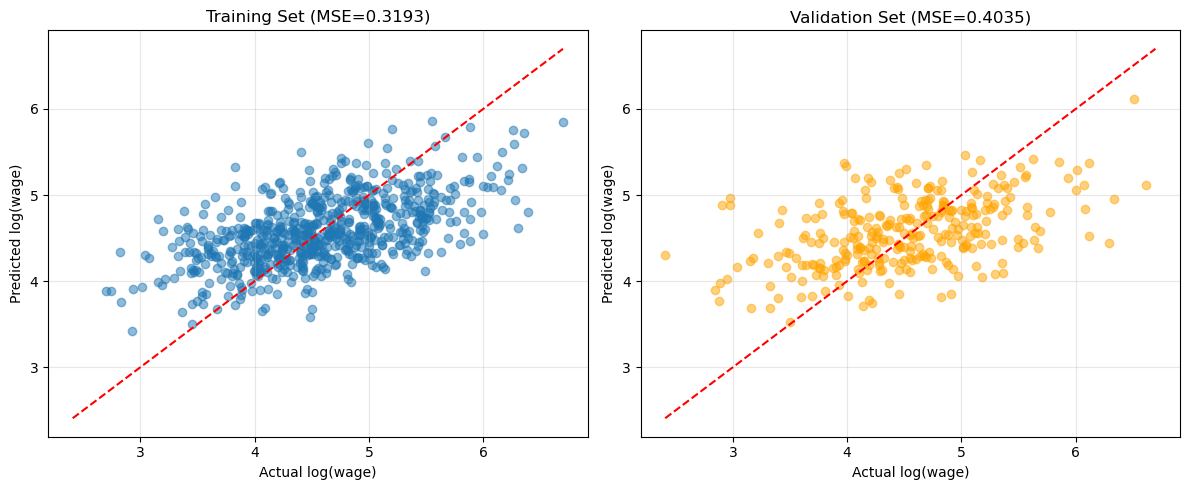


=== Full Regression Results ===
                            OLS Regression Results                            
Dep. Variable:               log_wage   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.322
Method:                 Least Squares   F-statistic:                     111.4
Date:                Sat, 26 Jul 2025   Prob (F-statistic):           6.30e-59
Time:                        15:47:25   Log-Likelihood:                -593.66
No. Observations:                 700   AIC:                             1195.
Df Residuals:                     696   BIC:                             1214.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.91

In [13]:
# wage_regression_with_validation.py
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

# model00
# 1. Data Preparation with Train-Validation Split
data = pd.read_csv('wage_data.csv')
# Do preprocessing for the data set: Transfer the categorical features to dummy varibles.

print(data.head())
X = data[['educ', 'exper_sq', 'union']]  # Selected predictors
y = data['log_wage']
# example: X = data.drop('log_wage', axis=1)
# example: X = data.iloc[:,[0,2,5]]

# Split data (70% train, 30% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Standadize the variables except the dummy varibles.
# 3. Standardize features
scaler_X = StandardScaler().fit(X_train.iloc[:,0:9])
print(X_train.iloc[:,0:9].head())

scaler_y = StandardScaler().fit(y_train)
X_train = scaler_X.transform(X_train)
X_val = scaler_X.transform(X_val)
y_train = scaler_y.transform(y_train)
y_val = scaler_y.transform(y_val)

# Add intercept separately to maintain clean data splitting
X_train = sm.add_constant(X_train)
X_val = sm.add_constant(X_val)



print(f"Training samples: {len(X_train)}, Validation samples: {len(X_val)}")

# 2. Model Specification
model01 = sm.OLS(y_train, X_train)  # Model specification on training data
print("\nModel specified on training data")

# 3. Model Fitting
results01 = model01.fit()  # Fitting on training data
print("Model fitted on training data")

# 4. Performance Evaluation
train_pred = results01.predict(X_train)
val_pred = results01.predict(X_val)

train_mse = ((y_train - train_pred)**2).mean()
val_mse = ((y_val - val_pred)**2).mean()

print("\n=== Performance Metrics ===")
print(f"Training MSE:   {train_mse:.5f}")
print(f"Validation MSE: {val_mse:.5f}")
print(f"R-squared:      {results01.rsquared:.3f}")

# 5. Visualization (Actual vs Predicted)
plt.figure(figsize=(12, 5))

# Training set plot
plt.subplot(1, 2, 1)
plt.scatter(y_train, train_pred, alpha=0.5, label='Training Data')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual log(wage)')
plt.ylabel('Predicted log(wage)')
plt.title(f'Training Set (MSE={train_mse:.4f})')
plt.grid(True, alpha=0.3)

# Validation set plot
plt.subplot(1, 2, 2)
plt.scatter(y_val, val_pred, alpha=0.5, label='Validation Data', color='orange')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual log(wage)')
plt.ylabel('Predicted log(wage)')
plt.title(f'Validation Set (MSE={val_mse:.4f})')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('train_val_comparison.png', dpi=300)
print("\nVisualization saved to 'train_val_comparison.png'")
plt.show()

# 6. Full Results Summary
print("\n=== Full Regression Results ===")
print(results01.summary())



# model 01
X = data[['educ', 'exper_sq']]  # Selected predictors
y = data['log_wage']

# Split data (70% train, 30% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Add intercept separately to maintain clean data splitting
X_train = sm.add_constant(X_train)
X_val = sm.add_constant(X_val)

print(f"Training samples: {len(X_train)}, Validation samples: {len(X_val)}")

# 2. Model Specification
model01 = sm.OLS(y_train, X_train)  # Model specification on training data
print("\nModel specified on training data")

# 3. Model Fitting
results01 = model01.fit()  # Fitting on training data
print("Model fitted on training data")

# 4. Performance Evaluation
train_pred = results01.predict(X_train)
val_pred = results01.predict(X_val)

train_mse01 = ((y_train - train_pred)**2).mean()
val_mse01 = ((y_val - val_pred)**2).mean()

print("\n=== Performance Metrics ===")
print(f"Training MSE:   {train_mse01:.5f}")
print(f"Validation MSE: {val_mse01:.5f}")
print(f"R-squared:      {results01.rsquared:.3f}")

In [15]:
print("val_MSE   valMSE01")
print(val_mse, val_mse01)

val_MSE   valMSE01
0.40346676132306847 0.4149509492280527


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Standardize features
scaler_X = StandardScaler().fit(X_train)
scaler_y = StandardScaler().fit(y_train)
X_train = scaler_X.transform(X_train)
X_val = scaler_X.transform(X_val)
y_train = scaler_y.transform(y_train)
y_val = scaler_y.transform(y_val)

# 4. Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_val, dtype=torch.float32)
y_test_tensor = torch.tensor(y_val, dtype=torch.float32)

# 5. Define simple DNN
class DNNRegressor(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(10, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.net(x)

model = DNNRegressor()

# 6. Loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001) #learning rate

# 7. Training
for epoch in range(100):
    model.train()
    optimizer.zero_grad()
    output = model(X_train_tensor)
    loss = criterion(output, y_train_tensor)
    loss.backward()
    optimizer.step()
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")

# 8. Evaluation
model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor)
    test_loss = criterion(predictions, y_test_tensor)
    print(f"\nTest MSE: {test_loss.item():.4f}")